In [1]:
using Plots
using LaTeXStrings
using Colors, ColorSchemes
cs1 = ColorScheme(range(colorant"red", colorant"royalblue1", length=5));

using DelimitedFiles

const e_charge = 1.60217663E-19 
const r_e = 2.8179402895E-15
const mec2 = 510998.94999999995

510998.94999999995

# Lattice Parameters

In [2]:
rho = 1.5
gamma = 10000.0
phi_m = 0.2

beta = (1-1/gamma^2)^(1/2)
lamb = 0.01/rho

#sigma_z = 50e-6
#sigma_x = 50e-6

p0c = gamma * beta * mec2

#L0 = (24*sigma_z*rho^2)^(1/3)

5.109989474450051e9

# Beam Initialization

In [21]:
using Distributions, Random

# Fake Gaussian beam

Np = 5000000   # Number of macro-particles
Q = 5E-9       # Total charge in C

charges = ones(Np)*Q/Np;

bb = Array{Float64, 2}(undef, 6, Np);
Random.seed!(1234)

bb[1,1:Np] = rand(Normal(0, 50E-6), Np);
bb[2,1:Np] = rand(Normal(0, 50E-6), Np);
bb[3,1:Np] = rand(Normal(0, 50E-6), Np);
bb[4,1:Np] = rand(Normal(0, 50E-6), Np);
bb[5,1:Np] = rand(Normal(0, 50E-6), Np);
bb[6,1:Np] = rand(Normal(0, 1E-6), Np);

zmin = minimum(bb[5,:])
zmax = maximum(bb[5,:])
xmin = minimum(bb[1,:])
xmax = maximum(bb[1,:])

z_b = bb[5,:]
x_b = bb[1,:];

In [4]:
include("../core/kick2.jl")

csr2d_kick_calc_exit (generic function with 1 method)

# Wake grids computation (GPU required)
#### The computed wake grids from "csr2d_kick_calc_entrance" and "csr2d_kick_calc_exit"
#### have a unit of $1/m^2$.

### Entrance wake

In [22]:
phi = 0.05
nz=201
nx=101
nxp=301
M=7

dict_ent = csr2d_kick_calc_entrance(z_b, x_b, charges,
    gamma=gamma, rho=rho, phi=phi,
    nz=nz, nx=nx, nxp=nxp, M=M, reverse_bend=false)

 Applying charge deposition...
 Computing Case A+B wake grid(s) via GPU...
 12.204935 seconds (109 CPU allocations: 5.328 KiB)
 11.620386 seconds (112 CPU allocations: 5.719 KiB)
 Interpolating wake value at the particle positions...


Dict{String, AbstractArray{Float64}} with 7 entries:
  "zv"          => range(-0.000251101, stop=0.000272606, length=201)
  "ddelta_ds"   => [0.00162005, 0.000207211, 0.000224622, -0.000669879, -0.0001…
  "Ws_grid"     => [-2074.52 -1957.4 … 2232.82 2351.05; -2172.29 -2052.57 … 233…
  "lambda_grid" => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0…
  "xv"          => range(-0.000247439, stop=0.000266661, length=101)
  "Wx_grid"     => [1554.85 1476.03 … 1659.41 1735.5; 1615.46 1536.05 … 1720.18…
  "dxp_ds"      => [0.000204872, 0.000332855, 0.000357064, 0.000366738, 0.00037…

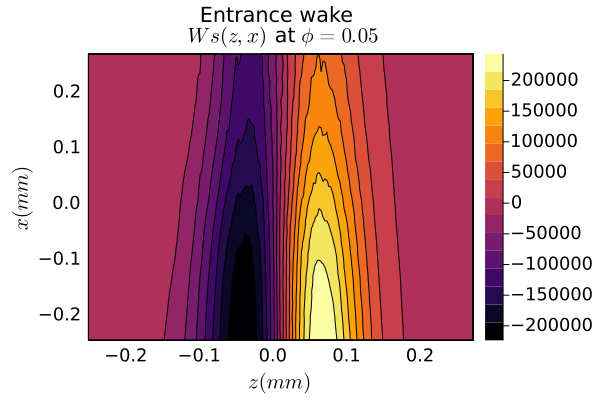

In [20]:
contourf(dict_ent["zv"]*1000, dict_ent["xv"]*1000, dict_ent["Ws_grid"]')

plot!(xlabel=L"$z(mm)$", ylabel=L"x(mm)", title="Entrance wake \n"*L" $Ws(z,x)$ at $\phi = 0.05$")
plot!(xtickfont=font(12), ytickfont=font(12), guidefont=font(14), margin=3Plots.mm, legend=(0.75, 0.90), legendfontsize = 10)
plot!(right_margin = 15Plots.mm)

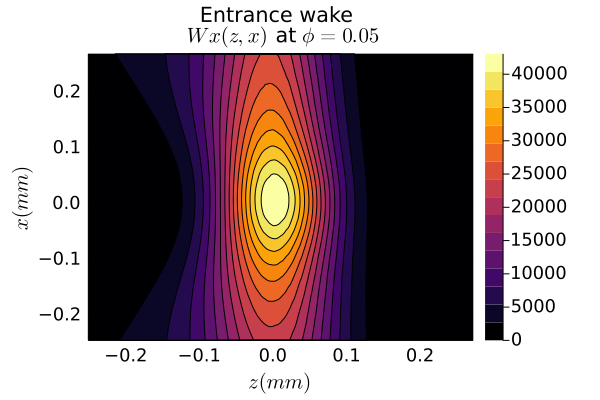

In [23]:
contourf(dict_ent["zv"]*1000, dict_ent["xv"]*1000, dict_ent["Wx_grid"]')

plot!(xlabel=L"$z(mm)$", ylabel=L"x(mm)", title="Entrance wake \n"*L" $Wx(z,x)$ at $\phi = 0.05$")
plot!(xtickfont=font(12), ytickfont=font(12), guidefont=font(14), margin=3Plots.mm, legend=(0.75, 0.90), legendfontsize = 10)
plot!(right_margin = 15Plots.mm)

### Exit wake

In [24]:
phi_m = 0.02
lamb = 0.1
nz=201
nx=101
nxp=301
M=7

dict_exit = csr2d_kick_calc_exit(z_b, x_b, charges,
    gamma=gamma, rho=rho, phi_m=phi_m, lamb=lamb,
    nz=nz, nx=nx, nxp=nxp, M=M, reverse_bend=false)

 Applying charge deposition...
 Computing Case C+D+E wake grid(s) via GPU...
 20.123964 seconds (305.79 k CPU allocations: 16.754 MiB)
 19.306035 seconds (122 CPU allocations: 5.781 KiB)
 Interpolating wake value at the particle positions...


Dict{String, AbstractArray{Float64}} with 7 entries:
  "zv"          => range(-0.000251101, stop=0.000272606, length=201)
  "ddelta_ds"   => [0.00035084, 8.80534e-5, 7.58269e-5, -9.25992e-5, 8.10883e-6…
  "Ws_grid"     => [-0.865533 -0.864277 … -1.14609 -1.1465; -0.124818 -0.119565…
  "lambda_grid" => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0…
  "xv"          => range(-0.000247439, stop=0.000266661, length=101)
  "Wx_grid"     => [0.000613534 0.000604278 … -0.000808436 -0.000820842; 1.7525…
  "dxp_ds"      => [7.15918e-6, 8.32764e-6, 8.08358e-6, 7.00305e-6, 7.68903e-6,…

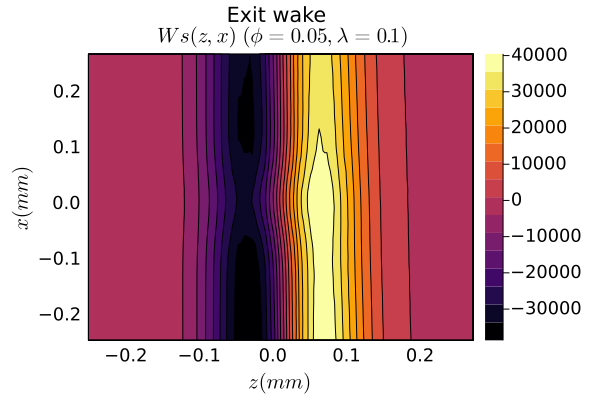

In [38]:
contourf(dict_exit["zv"]*1000, dict_exit["xv"]*1000, dict_exit["Ws_grid"]')

plot!(xlabel=L"$z(mm)$", ylabel=L"x(mm)", title="Exit wake \n"*L" $Ws(z,x)$ $(\phi = 0.05, \lambda=0.1)$")
plot!(xtickfont=font(12), ytickfont=font(12), guidefont=font(14), margin=3Plots.mm, legend=(0.75, 0.90), legendfontsize = 10)
plot!(right_margin = 15Plots.mm)

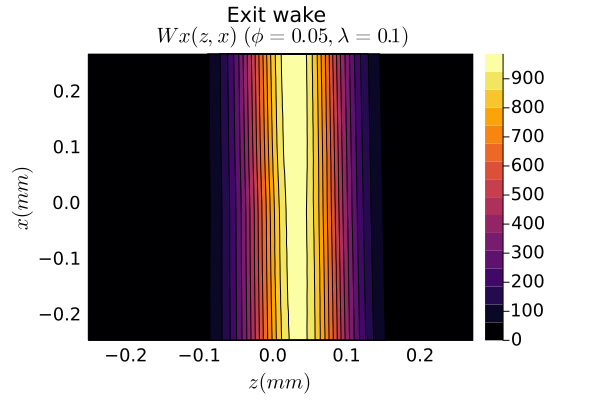

In [39]:
contourf(dict_exit["zv"]*1000, dict_exit["xv"]*1000, dict_exit["Wx_grid"]')

plot!(xlabel=L"$z(mm)$", ylabel=L"x(mm)", title=title="Exit wake \n"*L" $Wx(z,x)$ $(\phi = 0.05, \lambda=0.1)$")
plot!(xtickfont=font(12), ytickfont=font(12), guidefont=font(14), margin=3Plots.mm, legend=(0.75, 0.90), legendfontsize = 10)
plot!(right_margin = 15Plots.mm)